# Parking Space Optimization

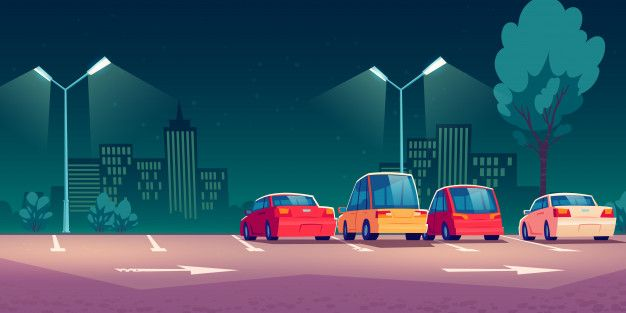

You are trying to find the best parking space to use that minimizes the time needed to get to your 
restaurant. There are 50 parking spaces, and you see spaces 1,2, . . . ,50 in order. As you approach each 
parking space, you see whether it is full or empty. We assume, somewhat heroically, that the probability 
that each space is occupied follows an independent Bernoulli process, which is to say that each space will 
be occupied with probability p, but will be free with probability 1 - p, and that each outcome is 
independent of the other.

It takes 2 seconds to drive past each parking space and it takes 8 seconds to walk past. That is, if we park 
in space n, it will require 8(50 - n) seconds to walk to the restaurant. Furthermore, it would have taken 
you 2n seconds to get to this space. If you get to the last space without finding an opening, then you will 
have to drive into a special lot down the block, adding 30 seconds to your trip.

We want to find an optimal strategy for accepting or rejecting a parking space.

**(a)** Give the sets of state and action spaces.

There are 50 parking spaces,51 represents 'restaurant',and 52 represents 'special lot'. S = 1,2,3,4,...,50,51,52

In [1]:
states1 = [j for j in range(1,53)] 

"Accepting (A)" and "Rejecting (R)" of the park lots are action spaces of the agent.

In [2]:
action_spaces1 = ('A', 'R') 

**(b)** Give the optimality equations for solving this problem.

In this problem, our objective is to **minimize** the time required for parking while also ensuring that the selected parking space is closer to the restaurant. However, for applying the Bellman optimality function, this objective is adjusted to a **maximization** problem:

If the park space s is empty with probability of (1 - p), agent can 'Accept' or 'Reject' the park lot:

V(s) = p * (-2s + V(s+1)) + (1 - p) * (− 2s − 8(50−s) + V(51))

If the park space is full, the agent must 'Reject' the park lot:

V(s) = −2s + V(s+1)

If the agent 'Rejects' 50st park lot, and it will go to special lot with plus 30 seconds:

V(s) = − 2s - 30

**V(s) :** Expected total cost for state s.

**p :** Probability of the parking space being occupied.


**s :** Current parking space.

**V(s+1):** Expected total cost for the next parking space.


**2 * s :** Cost of arrival when taking the park action.


**8 * (50−s) :** Cost of walking to the restaurant when taking the park action.


**V(51) :** Expected total cost for the place where the restaurant is.

**(c)** You have just looked at space 45, which was empty. There are five more spaces remaining (46 through 
50). What should you do? Using p = 0.6, find the optimal policy by solving your optimality equations for 
parking spaces 46 through 50.

Parking lots are occupied with p = 0.6 (empty with p = 0.4) between 46 and 50, so probability and related rewards would be:

In [3]:
import numpy as np

In [4]:
action_space = ('A', 'R')

In [5]:
States = [i for i in range(46, 53)]

In [6]:
probs = {   
    (46,'A',51): 0.4,  # p = 0.6 (park lot is occupied), p = 1-0.6 = 0.4 (park lot is empty)
    (46,'R',47): 1, 
    (47,'A',51): 0.4,
    (47,'R',48): 1,
    (48,'A',51): 0.4,
    (48,'R',49): 1,
    (49,'A',51): 0.4,
    (49,'R',50): 1,
    (50,'A',51): 0.4,
    (50,'R',52): 1
}

In [7]:
Rewards = {(46, 'A', 51): -123,  # - 2 * 46 - 8 * (50 - 46) + 1 = - 123
           (46, 'R', 47): -92,   # - 2 * 46 + 0 = - 92
           (47, 'A', 51): -117,  # - 2 * 47 - 8 * (50 - 47) + 1 = - 117
           (47, 'R', 48): -94,   # - 2 * 47 + 0 = - 94
           (48, 'A', 51): -111,  # - 2 * 48 - 8 * (50 - 48) + 1 = - 111
           (48, 'R', 49): -96,   # - 2 * 48 + 0 = - 96
           (49, 'A', 51): -105,  # - 2 * 49 - 8 * (50 - 49) + 1 = - 105
           (49, 'R', 50): -98,   # - 2 * 49 + 0 = - 98
           (50, 'A', 51): -99,   # - 2 * 50 - 8 * (50 - 50) + 1 = - 99
           (50, 'R', 52): -130,  # - 2 * 50 - 30 = - 130
           }

In [8]:
def is_terminal(s):
    return s in [51,52]

In [9]:
def get_next_state(s, a):
    if a == 'A' and s <= 50:
        return 51
    elif a == 'R' and s <= 49:
        return s + 1
    elif a == 'R' and s == 50:
        return 52

In [10]:
transition_probs = {}
rewards={}
for s in States:
    if not is_terminal(s):
        for a in action_space:
            for s2 in States:
                if (s,a,s2) in probs:
                    transition_probs[(s, a, s2)]=probs.get((s, a, s2),0)
                else:
                    transition_probs[(s, a, s2)]=0
                if (s,a,s2) in Rewards:
                    rewards[(s, a, s2)]=Rewards.get((s, a, s2),0)
                else:
                    rewards[(s, a, s2)]=0

In [11]:
transition_probs

{(46, 'A', 46): 0,
 (46, 'A', 47): 0,
 (46, 'A', 48): 0,
 (46, 'A', 49): 0,
 (46, 'A', 50): 0,
 (46, 'A', 51): 0.4,
 (46, 'A', 52): 0,
 (46, 'R', 46): 0,
 (46, 'R', 47): 1,
 (46, 'R', 48): 0,
 (46, 'R', 49): 0,
 (46, 'R', 50): 0,
 (46, 'R', 51): 0,
 (46, 'R', 52): 0,
 (47, 'A', 46): 0,
 (47, 'A', 47): 0,
 (47, 'A', 48): 0,
 (47, 'A', 49): 0,
 (47, 'A', 50): 0,
 (47, 'A', 51): 0.4,
 (47, 'A', 52): 0,
 (47, 'R', 46): 0,
 (47, 'R', 47): 0,
 (47, 'R', 48): 1,
 (47, 'R', 49): 0,
 (47, 'R', 50): 0,
 (47, 'R', 51): 0,
 (47, 'R', 52): 0,
 (48, 'A', 46): 0,
 (48, 'A', 47): 0,
 (48, 'A', 48): 0,
 (48, 'A', 49): 0,
 (48, 'A', 50): 0,
 (48, 'A', 51): 0.4,
 (48, 'A', 52): 0,
 (48, 'R', 46): 0,
 (48, 'R', 47): 0,
 (48, 'R', 48): 0,
 (48, 'R', 49): 1,
 (48, 'R', 50): 0,
 (48, 'R', 51): 0,
 (48, 'R', 52): 0,
 (49, 'A', 46): 0,
 (49, 'A', 47): 0,
 (49, 'A', 48): 0,
 (49, 'A', 49): 0,
 (49, 'A', 50): 0,
 (49, 'A', 51): 0.4,
 (49, 'A', 52): 0,
 (49, 'R', 46): 0,
 (49, 'R', 47): 0,
 (49, 'R', 48): 0,
 (49

In [12]:
rewards

{(46, 'A', 46): 0,
 (46, 'A', 47): 0,
 (46, 'A', 48): 0,
 (46, 'A', 49): 0,
 (46, 'A', 50): 0,
 (46, 'A', 51): -123,
 (46, 'A', 52): 0,
 (46, 'R', 46): 0,
 (46, 'R', 47): -92,
 (46, 'R', 48): 0,
 (46, 'R', 49): 0,
 (46, 'R', 50): 0,
 (46, 'R', 51): 0,
 (46, 'R', 52): 0,
 (47, 'A', 46): 0,
 (47, 'A', 47): 0,
 (47, 'A', 48): 0,
 (47, 'A', 49): 0,
 (47, 'A', 50): 0,
 (47, 'A', 51): -117,
 (47, 'A', 52): 0,
 (47, 'R', 46): 0,
 (47, 'R', 47): 0,
 (47, 'R', 48): -94,
 (47, 'R', 49): 0,
 (47, 'R', 50): 0,
 (47, 'R', 51): 0,
 (47, 'R', 52): 0,
 (48, 'A', 46): 0,
 (48, 'A', 47): 0,
 (48, 'A', 48): 0,
 (48, 'A', 49): 0,
 (48, 'A', 50): 0,
 (48, 'A', 51): -111,
 (48, 'A', 52): 0,
 (48, 'R', 46): 0,
 (48, 'R', 47): 0,
 (48, 'R', 48): 0,
 (48, 'R', 49): -96,
 (48, 'R', 50): 0,
 (48, 'R', 51): 0,
 (48, 'R', 52): 0,
 (49, 'A', 46): 0,
 (49, 'A', 47): 0,
 (49, 'A', 48): 0,
 (49, 'A', 49): 0,
 (49, 'A', 50): 0,
 (49, 'A', 51): -105,
 (49, 'A', 52): 0,
 (49, 'R', 46): 0,
 (49, 'R', 47): 0,
 (49, 'R', 48

In [13]:
def reward(space, action):
    return Rewards.get((space, action, 51), 1)

In [14]:
V = {}
for s in States:
    V[s] = 0

In [15]:
policy = {}
for s in States:
    if not is_terminal(s):
        best_a = None
        best_value = float('-inf')
        for a in action_space:
            v = 0
            for s2 in States:
                r = rewards.get((s, a, s2), 0)
                v += transition_probs.get((s, a, s2), 0) * (r + V[s2])
            if v > best_value:
                best_value = v
                best_a = a
                policy[s] = best_a

In [16]:
policy

{46: 'A', 47: 'A', 48: 'A', 49: 'A', 50: 'A'}

**d)** Give the optimal value in part (c) corresponding to your optimal solution

In [17]:
policy = {46: 'A', 47: 'A', 48: 'A', 49: 'A', 50: 'A'}

In [18]:
def policy_evaluation(policy):
    V = {}
    SMALL_ENOUGH = 1e-3
    for s in States:
        V[s] = 0
    it = 0
    while True:
        biggest_change = 0
        for s in States:
            if s == 51:  
                V[s] = 0
            else:
                old_v = V[s]
                new_v = 0
                a = policy.get(s)
                r = reward(s, a)  
                for s2 in States:
                    new_v += probs.get((s, a, s2), 0) * (r + V[s2])
                V[s] = new_v
                biggest_change = max(biggest_change, abs(old_v - V[s]))
        print("iter:", it, "biggest_change:", biggest_change)
        it += 1
        if biggest_change < SMALL_ENOUGH:
            break
    print("\n\n")
    return V

In [19]:
optimal_values = policy_evaluation(policy)
for space, value in optimal_values.items():
    print(f"space {space}: optimal_value: {value}")

iter: 0 biggest_change: 49.2
iter: 1 biggest_change: 0



space 46: optimal_value: -49.2
space 47: optimal_value: -46.800000000000004
space 48: optimal_value: -44.400000000000006
space 49: optimal_value: -42.0
space 50: optimal_value: -39.6
space 51: optimal_value: 0
space 52: optimal_value: 0.0
